In [1]:
import natsort as natsort
import pandas as pd
import os
import natsort
from datetime import date, datetime
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']= False
from IPython.core.display_functions import display

# Schedule.ipynb를 작성하고 나서
### 의외로 득실차는 LG가 더 좋았다.

In [36]:
team_list = ["LG", "SSG", "키움"]
color_list=["#DB1916", "#fff000", "#760c0c"]
check_list = ["순위", "승리","득실차", "게임차"]

init_data = [0,0,0,0,0,0]
KBO_team = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배", "득점", "실점"], index=team_list)
for team in team_list:
    KBO_team.loc[team] = init_data

KBO_team

,경기수,승리,무승부,패배,득점,실점
LG,0,0,0,0,0,0
SSG,0,0,0,0,0,0
키움,0,0,0,0,0,0


In [37]:
rank_list = os.listdir("./date_rank")
sorted_rank = natsort.natsorted(rank_list)

In [38]:
df_list = []
for team, color in zip(team_list, color_list):
    df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","승점", "게임차", "순위", "일자", "득실차"])

    for file in sorted_rank:
        if file == ".DS_Store":
            continue
        date = datetime.strptime("2022."+file.replace('.csv', ''), '%Y.%m.%d')
        rank_df = pd.read_csv('./date_rank/'+file, index_col=0)
        rank_df["일자"] = date
        rank_df["승리"] = abs(rank_df["승리"]-rank_df.loc["SSG", "승리"])
        rank_df["득실차"] = rank_df["득점"] - rank_df["실점"]

        rank_list = list(rank_df.loc[team, :])
        df_result.loc[len(df_result)] = rank_list
    df_list.append(df_result)

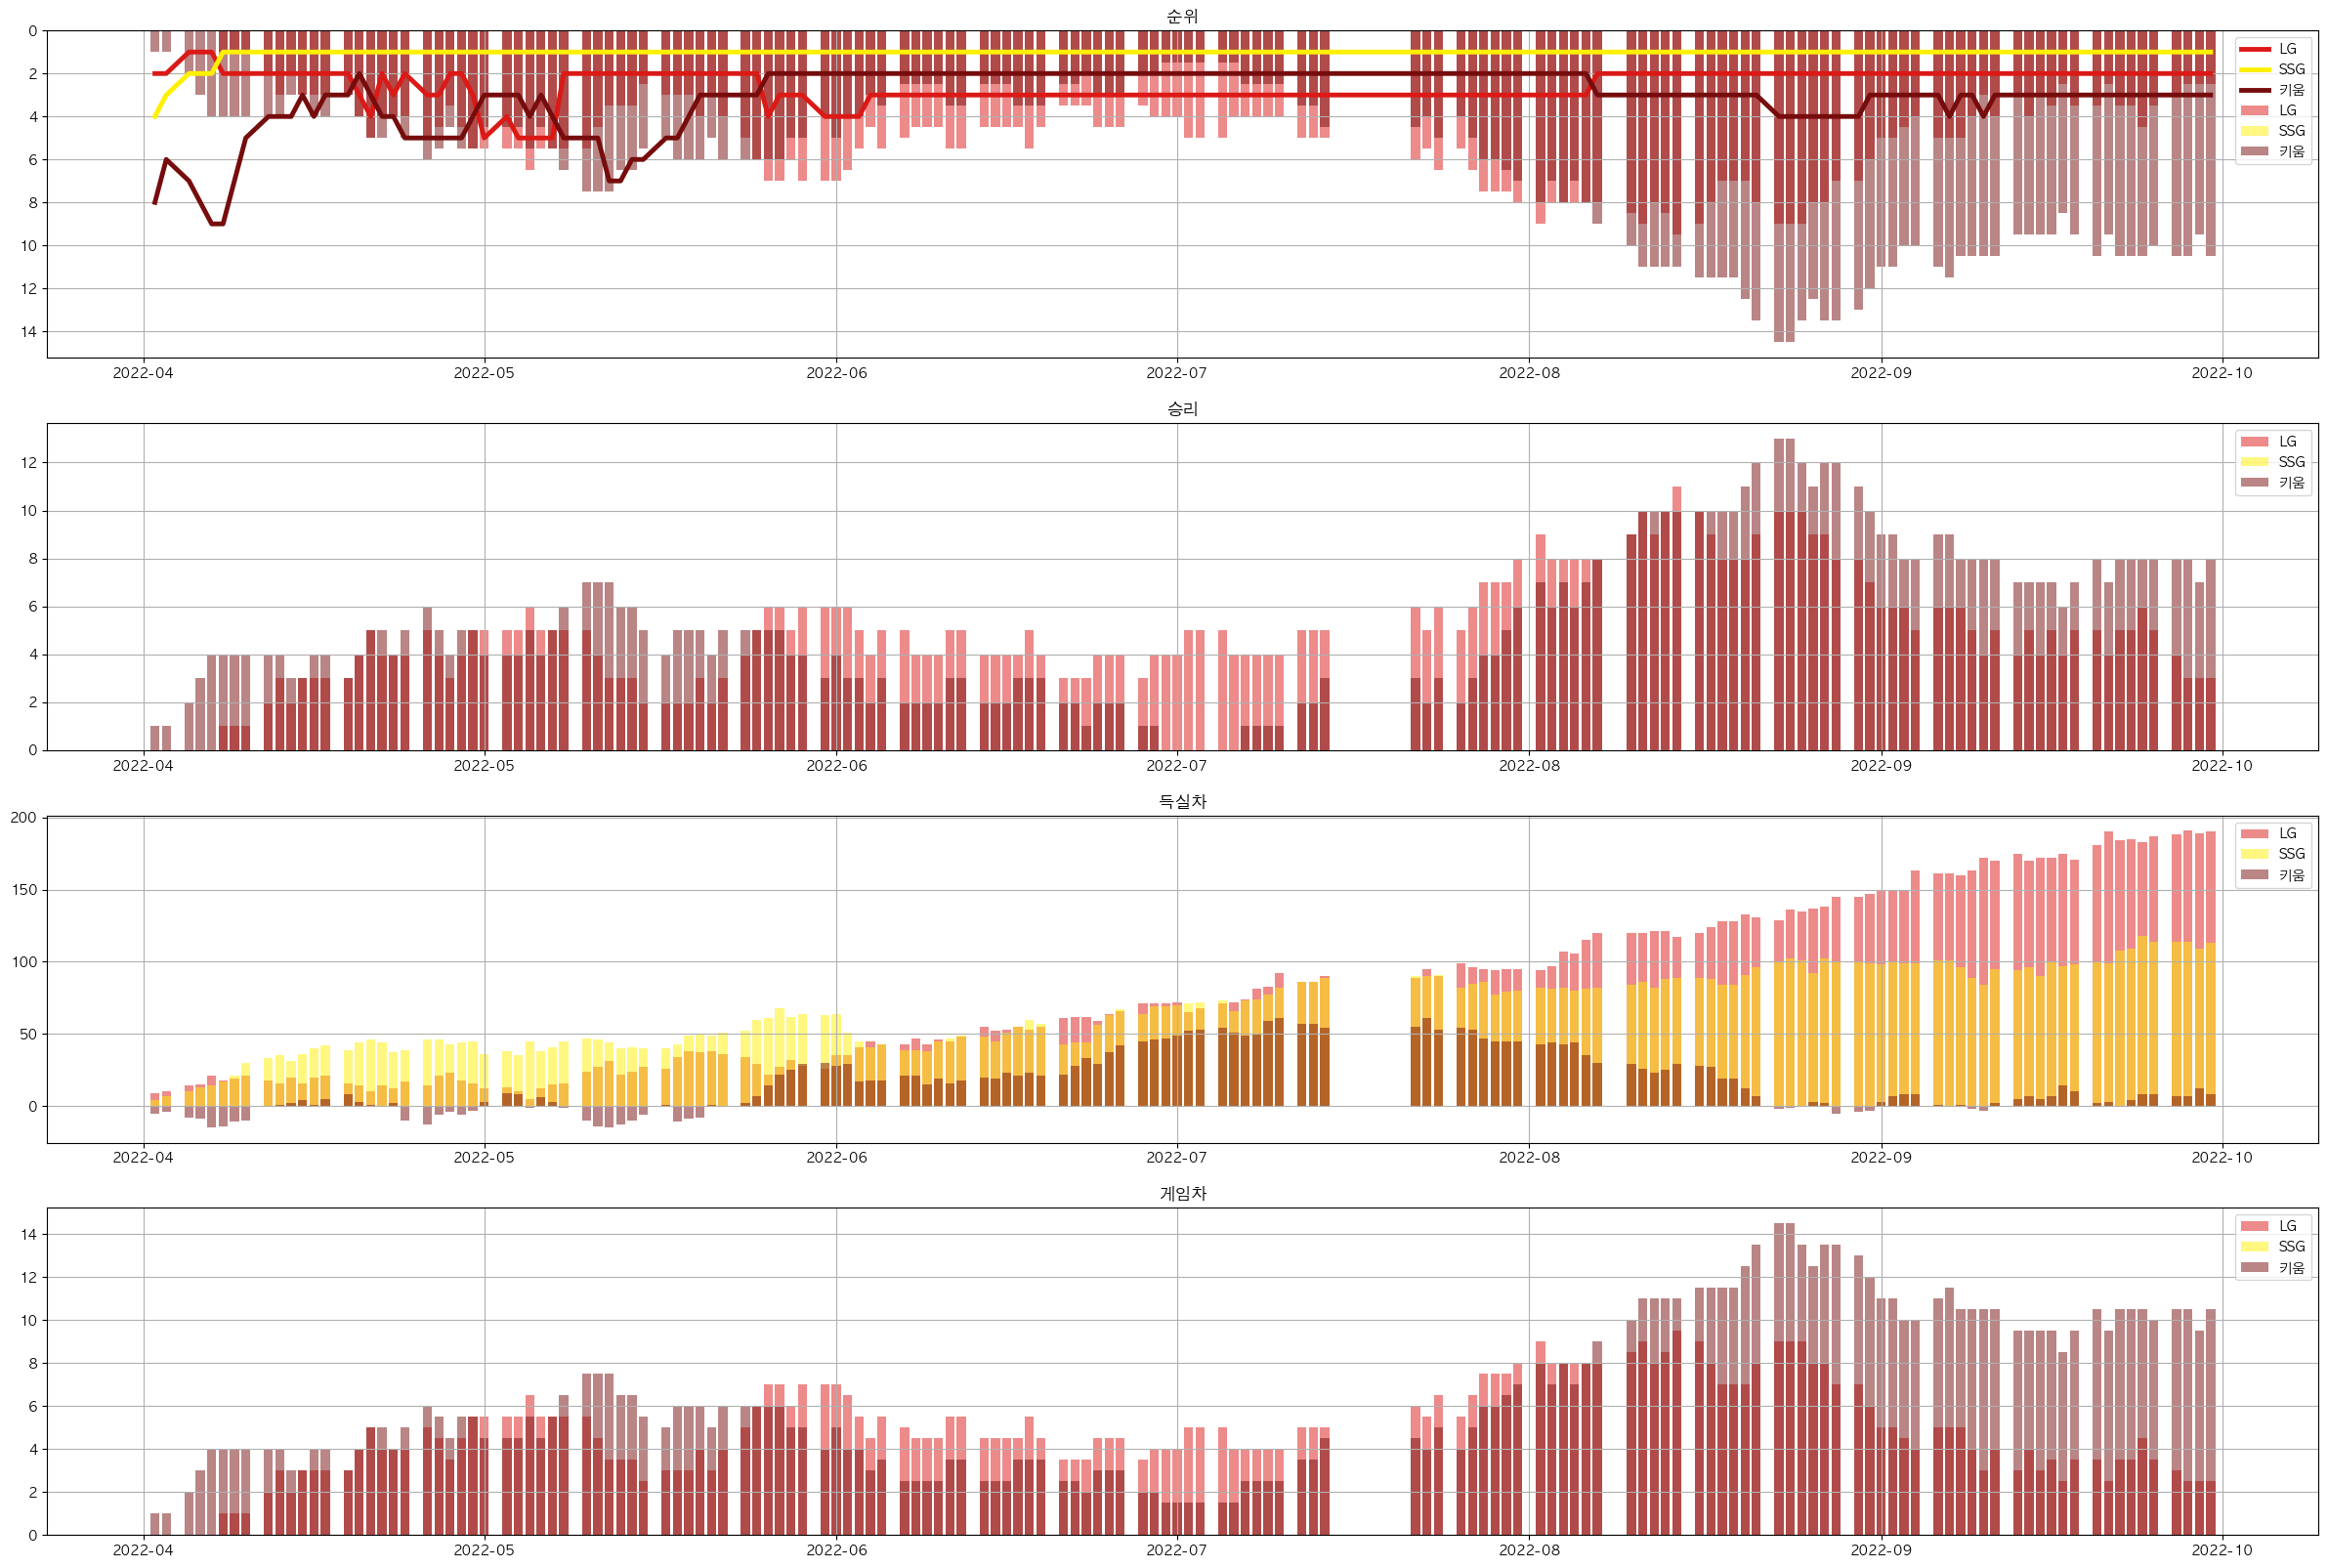

In [40]:
nrow = 3
ncol = 1
plt.figure(figsize=(30,20))

for r, check in enumerate(check_list, start=1):
    plt.subplot(4, 1, r)
    plt.title(check)
    for team, color, name in zip(df_list, color_list, team_list):
        if r != 1:
            plt.bar(team["일자"], team[check], label=name, color=color, alpha=0.5)
        elif r==1:
            plt.plot(team["일자"], team[check], label=name, color=color, linewidth=3.5)
            plt.bar(team["일자"], team["게임차"], label=name, alpha=0.5, color=color)
            plt.gca().invert_yaxis()
    plt.grid()
    plt.legend(loc='best')

plt.show()

- 전반기에는 SSG가 더 적게 실점하고 더 많이 득점을 얻어내는 경향을 보였음
- 하지만 6월 두 팀 간의 격차가 줄어들기 시작함
- 결국 올스타전 이후로 LG가 득실차에서 더 우위를 선점하기 시작함.
- LG가 하지만 결국 승리 차이를 극복하는데는 실패함

- 여기까지가 `네이버 경기일정`에서 얻어낸 정보

# 어떤 이유로 SSG가 wire to wire 우승을 거둘 수 있었는가?
- 득실차에서 2위한테도 밀리는데?
## 타자 조사

In [164]:
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2022&ye=2022&se=0&te=LG&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=50&si=&cn="
# pa => 시작 인덱스
# sn => 화면에 나타낼 데이터 수
# 즉, pa=0&sn=30 -> 0번부터 30개 정보 출력 / pa=0&sn=50 -> 0번부터 50개 정보 있는대로 출력
df = pd.read_html(url, index_col=1)
len(df)

3

In [165]:
df[0] = df[0].drop(["팀"], axis=1)

/var/folders/lz/2mfdswrd571f8d69ht6n663w0000gn/T/ipykernel_45750/3901085681.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df[0] = df[0].drop(["팀"], axis=1)


In [166]:
test = df[0]["비율"].drop(["wRC+", "OPS"], axis=1)
test.drop(test == "이름")

KeyError: "['타율' '출루' '장타' 'wOBA'] not found in axis"

In [167]:
test = test.dropna()
test = test.drop(["이름"])

In [168]:
test = test.astype('float')
test.dtypes

이름
타율      float64
출루      float64
장타      float64
wOBA    float64
dtype: object

In [169]:
test["출-타"] = test["출루"] - test["타율"]
test["장-타"] = test["장타"] - test["타율"]
test["장-출"] = test["장타"] - test["출루"]
test

이름,타율,출루,장타,wOBA,출-타,장-타,장-출
오지환,0.261,0.349,0.466,0.366,0.088,0.205,0.117
김현수,0.283,0.374,0.475,0.382,0.091,0.192,0.101
문보경,0.315,0.380,0.454,0.377,0.065,0.139,0.074
박해민,0.285,0.344,0.367,0.330,0.059,0.082,0.023
채은성,0.299,0.358,0.438,0.362,0.059,0.139,0.080
홍창기,0.282,0.383,0.348,0.347,0.101,0.066,-0.035
문성주,0.303,0.401,0.422,0.375,0.098,0.119,0.021
유강남,0.251,0.322,0.351,0.312,0.071,0.100,0.029
이재원,0.226,0.318,0.462,0.350,0.092,0.236,0.144
가르시아,0.215,0.315,0.369,0.320,0.100,0.154,0.054


<AxesSubplot: >

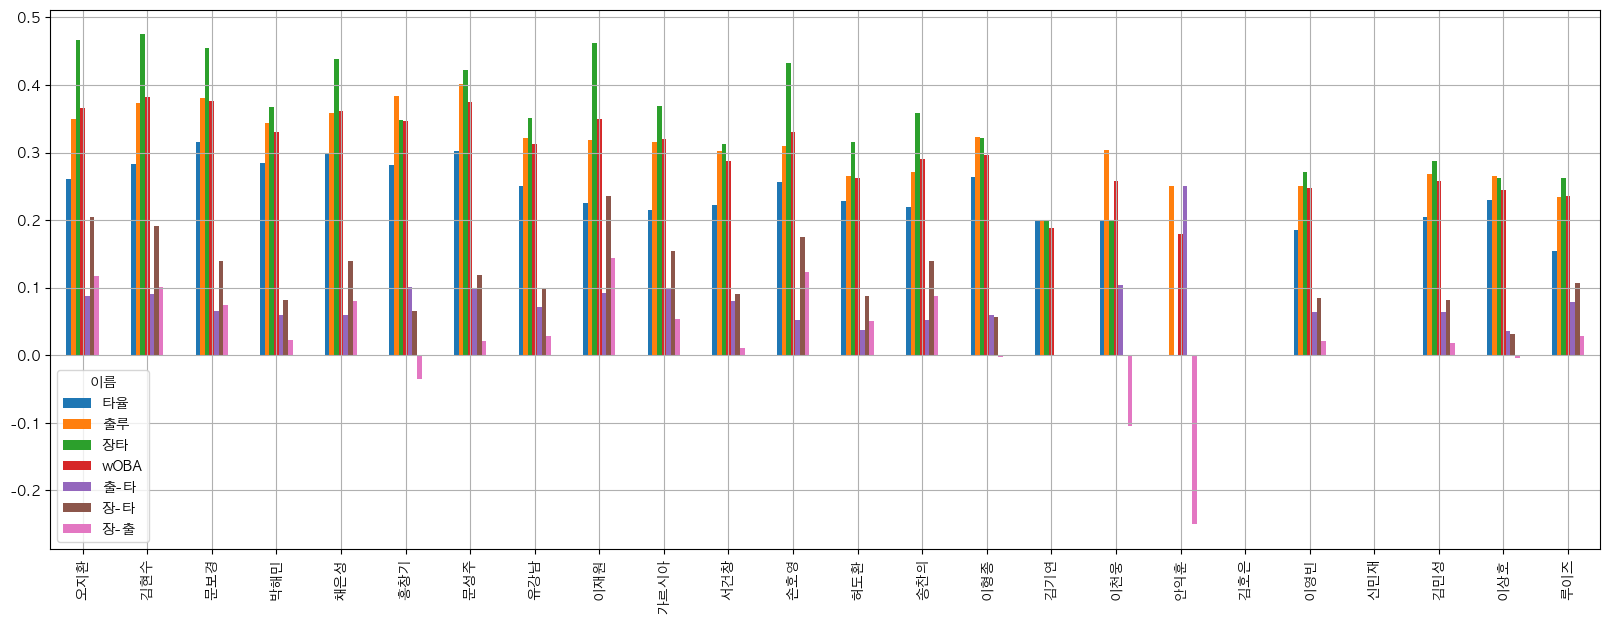

In [176]:
test.plot(kind="bar", figsize=(20, 7), grid=True)

<AxesSubplot: title={'center': '출루/타율 단순 비교'}>

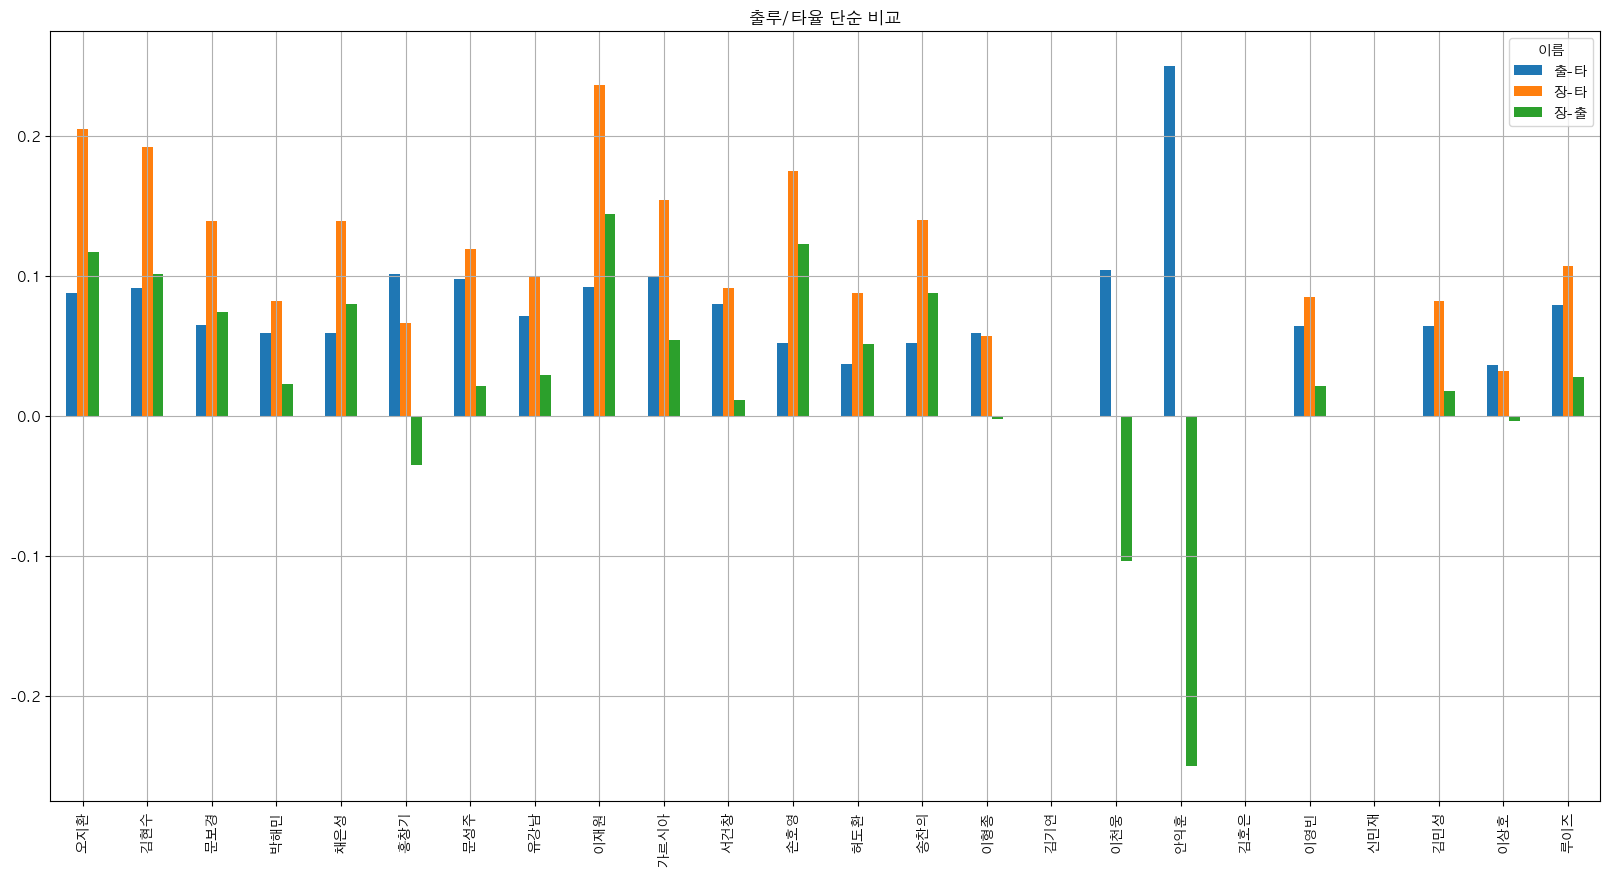

In [174]:
test[["출-타", "장-타", "장-출"]].plot(kind='bar', figsize=(20,10), title="출루/타율 단순 비교", grid=True)